In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri
import matplotlib.pylab as pl


0.0 1.0
3.798629583333333


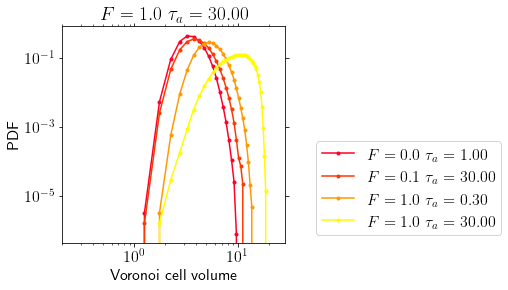

In [126]:
mpl.rcParams.update({'font.size':16, 'text.usetex':True})
# print(mpl.rcParams.keys)
fig,ax=plt.subplots(1,1,figsize=(4,4))
# ax.set_prop_cycle(cycler('color', plt.cm.RdBu))
fpath='../../prod_runs/RC_G1200_N100_R020/analysis/'
ind=3
colors = pl.cm.gist_rainbow(np.linspace(0,1,15))

for (name,tp) in [('low',10)]:#,('mid',1.0), ('high',100)]:
    rgs=[]
    Fs=[]
    Tas=[]
    rg_eq=0
    count=0
    ax.clear()
    fnames=sorted([xx for xx in os.listdir(fpath) if '.npz' in xx],key=lambda x: float(x.split('_')[ind+1].replace('F','')))
    
    for fname in fnames:
        if 'shape_descriptors' in fname and 'rep1' in fname:
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)

            npzfile=np.load(fpath+fname)
            hist,bins=npzfile['rg'][0],npzfile['rg'][1]
            Fs.append(F)
            Tas.append(Ta)
            # print(npzfile.files)
            rg_avg=simps(npzfile['rg'][0]*npzfile['rg'][1], npzfile['rg'][1])
            
            rgs.append(rg_avg)
            Nrep=1
            for index in range(2,10):
                fname_rep=fname.replace('rep1','rep{}'.format(index))

                if fname_rep in fnames:
                    # print(fname_rep)
                    repfile=np.load(fpath+fname_rep)
                    try:
                        hist+=repfile['rg'][0][:len(hist)]
                        Nrep+=1
                    except(ValueError,):
                        val=repfile['rg'][0]
                        hist+=np.pad(val, (0,hist.shape[0]-val.shape[0]))
                        Nrep+=1
            hist=hist/(Nrep)
            
            if F==0: print(F,Ta)
            if F==0 and Ta==1: 
                rg_eq=rg_avg
                Fs.append(0)
                Tas.append(0.01)
                rgs.append(rg_eq)
            if F==0.0 or (F==1 and Ta==0.3) or (F==1 and Ta==30.0) or (F==0.1 and Ta==30.0):
                ax.plot(npzfile['rg'][1], npzfile['rg'][0],'.-', label='$F={}\ \\tau_a={:.2f}$'.format(F,Ta),color=colors[count])
                count+=1
                ax.set_title('$F={}\ \\tau_a={:.2f}$'.format(F,Ta))
                # print(vcv_avg)
    ax.legend(loc='lower left',bbox_to_anchor=(1.1,0))
    # ax.semilogx()
    # ax.set_xlim(0,20)
    ax.set_ylabel('PDF')
    ax.loglog()
    print(rg_eq)
    ax.set_xlabel('Voronoi cell volume')
    # print(np.unique(Fs),np.unique(Tas))
    # fig.savefig(fpath+'plots/VCV_{}Ta.png'.format(name),bbox_inches='tight', dpi=300)


Text(0.5, 1.0, 'Average Radius of Gyration')

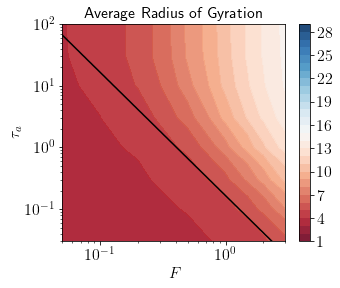

In [127]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
Xp,Yp=np.meshgrid(np.logspace(-4,1,100), np.logspace(-4,4,100))
Xi,Yi=np.meshgrid(np.unique(Fs),np.unique(Tas))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.array(rgs))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(1,30,1),cmap='RdBu',alpha=0.9)
plt.colorbar()
# plt.contour(Xi, Yi, Zi, levels=[20],colors='k',linestyles='dotted')
# plt.plot(Xi,Yi,'+')

plt.contour(Xp, Yp, Xp**2*Yp/(0.1*200*0.0083), levels=[1.], colors='k')
# plt.plot(Fs,Tas,'k+')
plt.loglog()
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.xlim(0.05,max(np.unique(Fs)))
plt.ylim(0.03,max(np.unique(Tas)))
plt.title('Average Radius of Gyration',fontsize=16)
# plt.savefig(fpath+'../plots/avgRG.png', dpi=300, bbox_inches='tight')


In [78]:
0.0083*200

1.66